In [3]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 99)
from matplotlib import pyplot as plt
import EDA
import utils
#sorted(glob('../data/*'))

In [2]:
df = utils.read_pickles('../data/previous_application').sort_values(['SK_ID_CURR', 'DAYS_DECISION'], ascending=[True, False])
df.head()

100%|██████████| 20/20 [00:43<00:00,  2.20s/it]


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,app_AMT_INCOME_TOTAL,app_AMT_CREDIT,app_AMT_ANNUITY,app_AMT_GOODS_PRICE,app_DAYS_BIRTH,app_DAYS_EMPLOYED,app_DAYS_REGISTRATION,app_DAYS_ID_PUBLISH,app_DAYS_LAST_PHONE_CHANGE,days_fdue-m-fdrw,days_ldue1-m-fdrw,days_ldue-m-fdrw,...,past_payment_50m,past_payment_51m,past_payment_52m,past_payment_53m,past_payment_54m,past_payment_55m,past_payment_56m,past_payment_57m,past_payment_58m,past_payment_59m,past_payment_60m,past_payment_61m,past_payment_62m,past_payment_63m,past_payment_64m,past_payment_65m,past_payment_66m,past_payment_67m,past_payment_68m,past_payment_69m,past_payment_70m,past_payment_71m,past_payment_72m,past_payment_73m,past_payment_74m,past_payment_75m,past_payment_76m,past_payment_77m,past_payment_78m,past_payment_79m,past_payment_80m,past_payment_81m,past_payment_82m,past_payment_83m,past_payment_84m,past_payment_85m,past_payment_86m,past_payment_87m,past_payment_88m,past_payment_89m,past_payment_90m,past_payment_91m,past_payment_92m,past_payment_93m,past_payment_94m,past_payment_95m,past_payment_96m,past_payment_97m,APP_CREDIT_PERC
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,1,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,NaN,-1709.0,-1499.0,-1619.0,-1612.0,0.0,135000.0,568800.0,20560.5,450000.0,-19241,-2329,-5170.0,-812,-1740.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044079
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,1,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120,-1134.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12,1,1,0.000000,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,-828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868825
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,1,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,-828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968054
1223745,2396

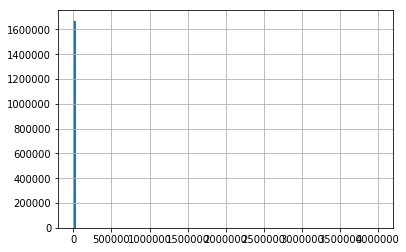

In [5]:
df['SELLERPLACE_AREA'].hist(bins=100); plt.show()

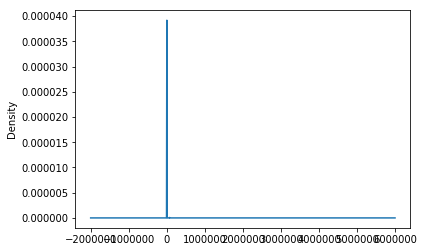

In [8]:
df['SELLERPLACE_AREA'].plot(kind='kde'); plt.show()

In [6]:
df['SELLERPLACE_AREA'].describe()

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

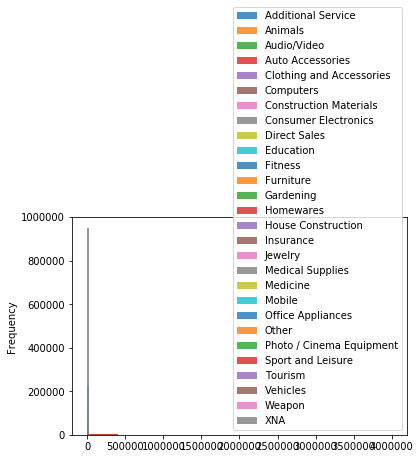

In [9]:
df.groupby('NAME_GOODS_CATEGORY').SELLERPLACE_AREA.plot(kind='hist', legend=True, alpha=.8); plt.show()

In [10]:
df.groupby('NAME_GOODS_CATEGORY').SELLERPLACE_AREA.describe()

,count,mean,std,min,25%,50%,75%,max
NAME_GOODS_CATEGORY,,,,,,,,
Additional Service,128.0,82.460938,107.781194,1.0,12.0,30.0,100.00,368.0
Animals,1.0,60.000000,NaN,60.0,60.0,60.0,60.00,60.0
Audio/Video,99441.0,1163.803994,1967.153511,-1.0,142.0,600.0,1720.00,49151.0
Auto Accessories,7381.0,290.939846,1019.245349,-1.0,44.0,86.0,188.00,30200.0
Clothing and Accessories,23554.0,145.235586,334.693911,-1.0,30.0,60.0,120.00,20000.0
Computers,105769.0,854.113824,1949.194876,-1.0,59.0,187.0,1200.00,112000.0
Construction Materials,24995.0,1522.052891,9455.265147,-1.0,22.0,50.0,166.00,250000.0
Consumer Electronics,121576.0,1060.392026,2047.598459,-1.0,136.0,455.0,1511.00,120000.0
Direct Sales,446.0,94.374439,136.011752,-1.0,30.0,50.0,100.00,958.0


In [3]:
train = utils.load_train()

100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


In [5]:
df['train'] = 0
df.loc[df['SK_ID_CURR'].isin(train.SK_ID_CURR), 'train'] = 1

In [10]:
df_test = df[df['train']==0]
df_train = df[df['train']==1]

In [11]:
EDA.df_info(df_train)

Shape: (1413701, 62)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_PREV,int64,0,1413701,1.000001e+06,1.922744e+06,2.845381e+06,532715.335255,"[2099199, 1843921, 1895112, 1893065, 1899210, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
SK_ID_CURR,int64,0,291057,1.000020e+05,2.784813e+05,4.562550e+05,102811.788043,"[265681, 173680, 242412, 206783, 382179, 38995...","[73, 72, 68, 67, 64, 64, 63, 62, 62, 61]"
NAME_CONTRACT_TYPE,object,0,4,NaN,NaN,NaN,NaN,"['Cash loans', 'Consumer loans', 'Revolving lo...","[626764, 625256, 161368, 313]"
AMT_ANNUITY,float64,307218,329537,0.000000e+00,1.583718e+04,4.180581e+05,14724.906897,"[2250.0, 11250.0, 6750.0, 9000.0, 22500.0, 450...","[26361, 12043, 11560, 10602, 10152, 9014, 5767..."
AMT_APPLICATION,float64,0,86766,0.000000e+00,1.752436e+05,5.850000e+06,293622.193141,"[0.0, 45000.0, 225000.0, 135000.0, 450000.0, 9...","[325302, 40087, 36921, 34905, 32801, 24945, 20..."
AMT_CREDIT,float64,1,81730,0.000000e+00,1.963541e+05,4.509688e+06,319481.250716,"[0.0, 45000.0, 225000.0, 450000.0, 135000.0, 1...","[276577, 29128, 17979, 16865, 16142, 14534, 11..."
AMT_DOWN_PAYMENT,float64,749540,26863,-9.000000e-01,6.655317e+03,3.060045e+06,20620.300440,"[0.0, 4500.0, 9000.0, 13500.0, 22500.0, 6750.0...","[313975, 18466, 12757, 8314, 6909, 6746, 5477,..."
AMT_GOODS_PRICE,float64,319525,86766,0.000000e+00,2.264512e+05,5.850000e+06,315937.604200,"[45000.0, 225000.0, 135000.0, 450000.0, 90000....","[40087, 36924, 34891, 32817, 24946, 20912, 170..."
WEEKDAY_APPR_PROCESS_START,object,0,7,NaN,NaN,NaN,NaN,"['WEDNESDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', '...","[215519, 215058, 214509, 213373, 211005, 20415..."
HOUR_APPR_PROCESS_START,int64,0,24,0.000000e+00,1.247893e+01,2.300000e+01,3.331474,"[11, 12, 10, 13, 14, 15, 9, 16, 17, 8]","[163264, 157528, 153800, 145838, 133621, 12089..."


In [12]:
EDA.df_info(df_test)

Shape: (256513, 62)


,DataType,#Nulls,#Uniques,Min,Mean,Max,Std,top10 val,top10 cnt
SK_ID_PREV,int64,0,256513,1.000002e+06,1.924989e+06,2.845382e+06,531947.632522,"[1574911, 2631763, 2744426, 1177705, 2748520, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
SK_ID_CURR,int64,0,47800,1.000010e+05,2.776732e+05,4.562500e+05,102829.065871,"[187868, 156367, 227585, 117425, 166618, 26083...","[77, 66, 60, 46, 44, 44, 44, 44, 43, 43]"
NAME_CONTRACT_TYPE,object,0,4,NaN,NaN,NaN,NaN,"['Cash loans', 'Consumer loans', 'Revolving lo...","[120789, 103895, 31796, 33]"
AMT_ANNUITY,float64,65017,105746,0.000000e+00,1.663656e+04,4.179276e+05,15090.577021,"[2250.0, 11250.0, 9000.0, 6750.0, 22500.0, 450...","[5504, 1931, 1894, 1882, 1751, 1583, 1404, 644..."
AMT_APPLICATION,float64,0,35597,0.000000e+00,1.751802e+05,6.905160e+06,288093.299405,"[0.0, 45000.0, 225000.0, 450000.0, 135000.0, 9...","[67100, 7744, 6622, 6104, 5773, 4422, 3825, 34..."
AMT_CREDIT,float64,0,45037,0.000000e+00,1.947910e+05,6.905160e+06,313528.235219,"[0.0, 45000.0, 225000.0, 450000.0, 135000.0, 1...","[60191, 5923, 3115, 3089, 2578, 2551, 2021, 18..."
AMT_DOWN_PAYMENT,float64,146304,9915,0.000000e+00,6.951022e+03,2.118938e+06,22650.422307,"[0.0, 4500.0, 9000.0, 13500.0, 22500.0, 6750.0...","[55879, 2775, 1990, 1341, 1256, 963, 764, 694,..."
AMT_GOODS_PRICE,float64,65990,35597,0.000000e+00,2.358650e+05,6.905160e+06,312151.117594,"[45000.0, 225000.0, 450000.0, 135000.0, 90000....","[7744, 6625, 6109, 5775, 4421, 3824, 3471, 322..."
WEEKDAY_APPR_PROCESS_START,object,0,7,NaN,NaN,NaN,NaN,"['TUESDAY', 'WEDNESDAY', 'MONDAY', 'FRIDAY', '...","[40060, 39491, 39048, 38675, 38094, 36472, 24673]"
HOUR_APPR_PROCESS_START,int64,0,24,0.000000e+00,1.251313e+01,2.300000e+01,3.347928,"[11, 12, 10, 13, 14, 15, 9, 16, 17, 8]","[29464, 28452, 27890, 26418, 24090, 22070, 193..."


In [13]:
obj_features = [c for c in train.columns if df[c].dtype=='O']

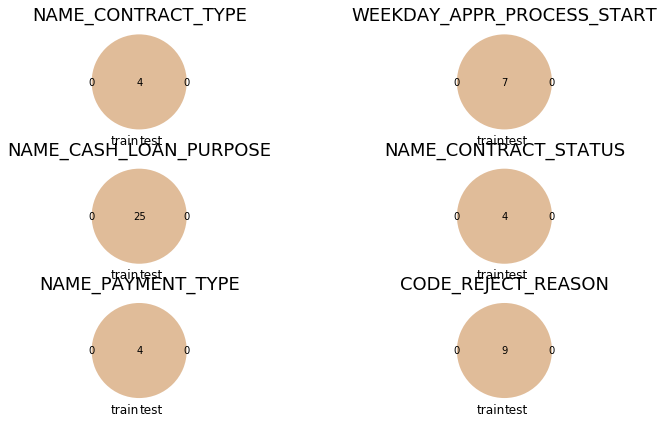

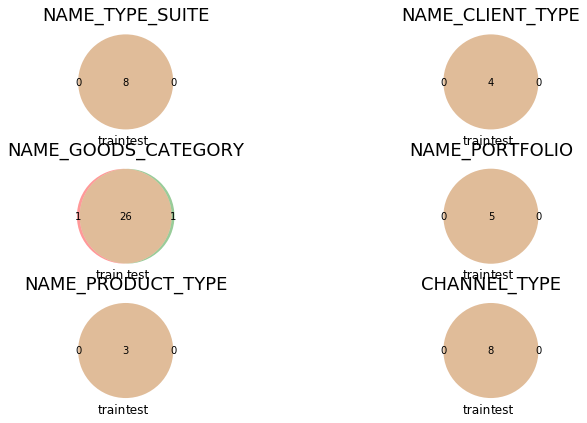

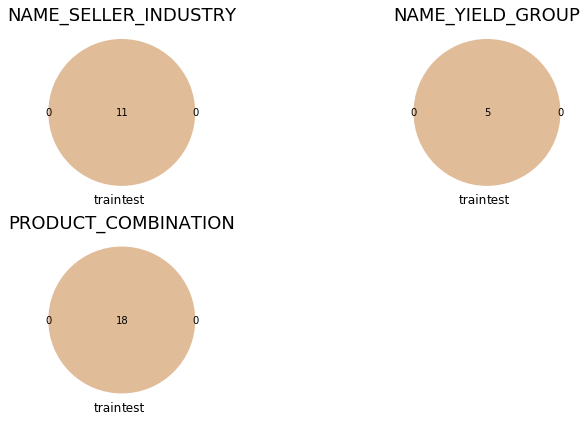

In [14]:
col = list(EDA.split_seq(obj_features, 6))
for c in col:
    EDA.venn_diagram(train, test, c, (12, 7))

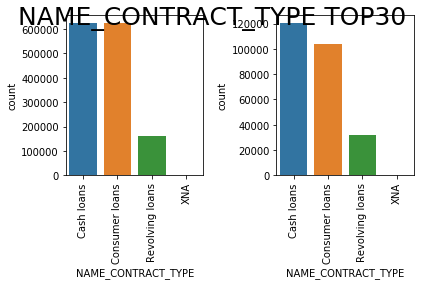

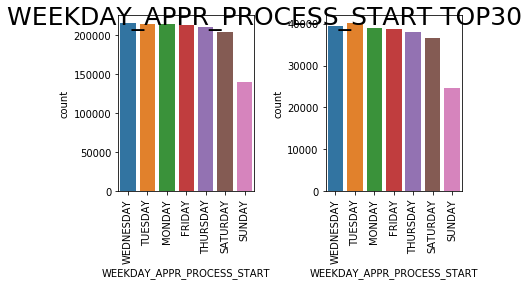

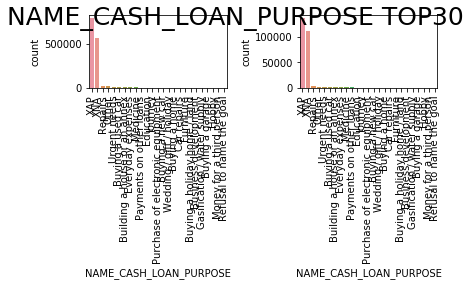

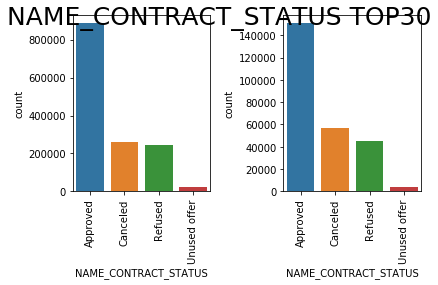

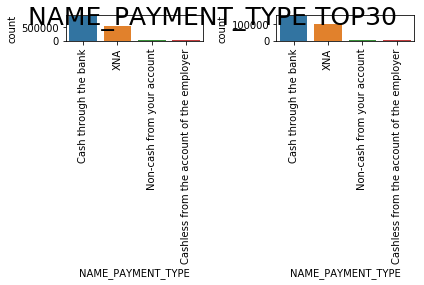

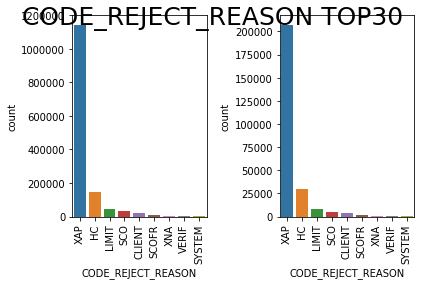

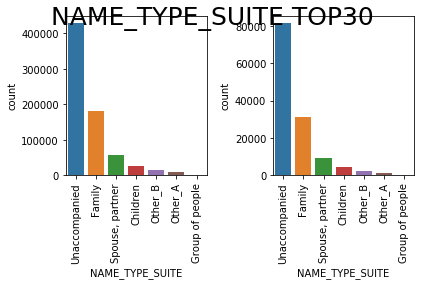

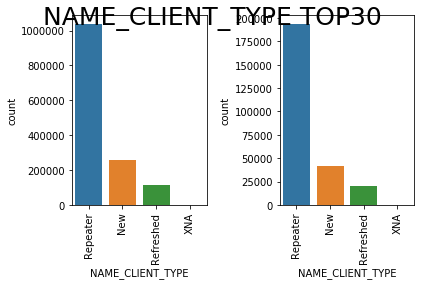

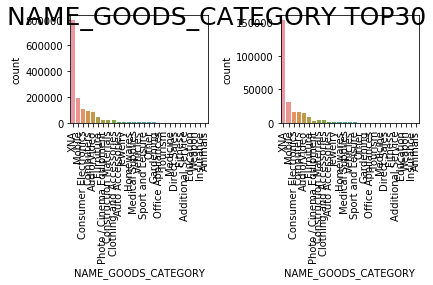

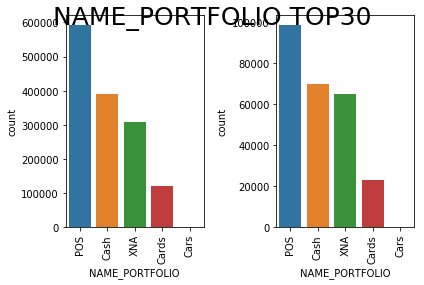

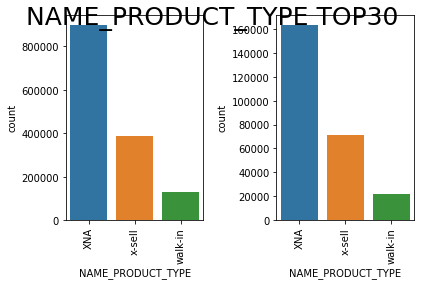

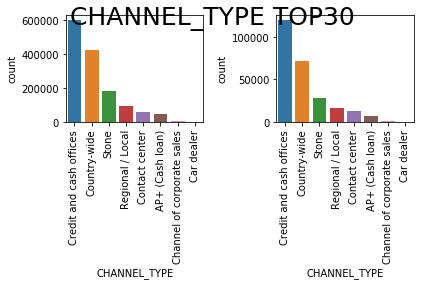

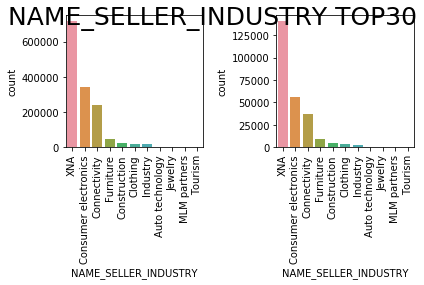

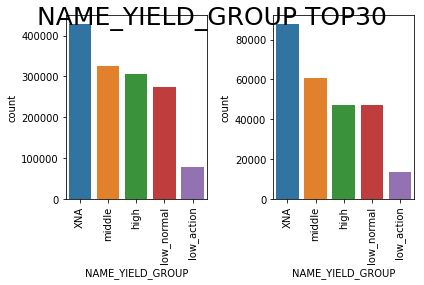

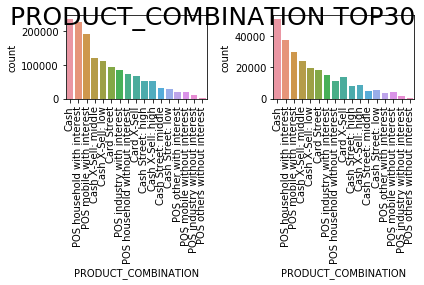

In [15]:
EDA.count_categories(df_train, obj_features, df2=df_test)

In [3]:
ids = df.SK_ID_CURR.unique()

In [4]:
tmp = df[df.SK_ID_CURR==np.random.choice(ids)]
tmp

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
365920,1299385,233573,Revolving loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,1,1,NaN,NaN,NaN,XAP,Canceled,-116,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1204654,2301069,233573,Consumer loans,6424.875,78070.5,90436.5,0.0,78070.5,SATURDAY,10,1,1,0.0,NaN,NaN,XAP,Approved,-273,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Country-wide,2661,Consumer electronics,18.0,low_normal,POS household with interest,365243.0,-243.0,267.0,365243.0,365243.0,1.0


In [5]:
tmp = df[df.SK_ID_CURR.isin(np.random.choice(ids, size=9))]
tmp

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
71327,2816415,140172,Revolving loans,NaN,0.00,0.0,NaN,NaN,MONDAY,15,1,1,NaN,NaN,NaN,XAP,Canceled,-323,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1077305,2844537,140172,Cash loans,NaN,0.00,0.0,NaN,NaN,MONDAY,16,1,1,NaN,NaN,NaN,XNA,Canceled,-323,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1095636,2071065,140172,Revolving loans,10125.000,202500.00,202500.0,NaN,202500.00,MONDAY,15,1,1,NaN,NaN,NaN,XAP,Approved,-323,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
559891,1887759,140172,Consumer loans,7936.200,94500.00,83583.0,18900.00,94500.00,TUESDAY,13,1,1,0.200851,NaN,NaN,XAP,Approved,-392,XNA,XAP,NaN,Refreshed,Homewares,POS,XNA,Stone,30,Construction,12.0,low_normal,POS industry with interest,365243.0,-333.0,-3.0,-303.0,-296.0,0.0
1411986,2565884,140172,Consumer loans,13712.940,117000.00,113989.5,11700.00,117000.00,FRIDAY,11,1,1,0.101380,NaN,NaN,XAP,Approved,-2314,Cash through the bank,XAP,Other_B,New,Computers,POS,XNA,Stone,57,Consumer electronics,10.0,middle,POS household with interest,365243.0,-2279.0,-2009.0,-2129.0,-2123.0,0.0
623924,1201303,144977,Consumer loans,4070.880,25605.00,32404.5,0.00,25605.00,FRIDAY,10,1,1,0.000000,NaN,NaN,XAP,Approved,-1830,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Country-wide,32,Connectivity,12.0,high,POS mobile with interest,365243.0,-1799.0,-1469.0,-1499.0,-1492.0,0.0
865889,1890382,144977,Consumer loans,4324.275,22810.50,21546.0,2281.50,22810.50,FRIDAY,16,1,1,0.104281,NaN,NaN,XAP,Approved,-2460,Cash through the bank,XAP,Children,Repeater,Mobile,POS,XNA,Country-wide,32,Connectivity,6.0,low_normal,POS mobile with interest,365243.0,-2429.0,-2279.0,-2279.0,-2269.0,1.0
74706,1591892,174025,Revolving loans,2250.000,45000.00,45000.0,NaN,45000.00,THURSDAY,15,1,1,NaN,NaN,NaN,XAP,Approved,-232,XNA,XAP,Unaccompanied,New,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,-232.0,-190.0,365243.0,365243.0,365243.0,0.0
605851,1124055,174025,Revolving loans,NaN,0.00,0.0,NaN,NaN,THURSDAY,15,1,1,NaN,NaN,NaN,XAP,Canceled,-232,XNA,XAP,NaN,New,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
678277,1593325,278032,Revolving loans,6750.000,135000.00,135000.0,NaN,135000.00,SATURDAY,13,1,1,NaN,NaN,NaN,XAP,Approved,-178,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),100,XNA,0.0,XNA,Card X-Sell,-178.0,-137.0,365243.0,365243.0,365243.0,0.0
